# An Introduction to Football Analytics: How to make a pass map for Football Data Analysis using Python

In [ ]:
!pip install mplsoccer
!pip install statsbombpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsbombpy import sb
from mplsoccer import Pitch, VerticalPitch

In [ ]:
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2022-12-01T11:42:34.874323,2021-06-13T16:17:31.694,None,2022-12-01T11:42:34.874323
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-11-15T17:26:10.871011,2021-06-13T16:17:31.694,None,2022-11-15T17:26:10.871011


In [ ]:
matches = sb.matches(competition_id=16, season_id=23)
matches.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,18237,2012-05-19,20:45:00.000,Europe - Champions League,2011/2012,Bayern Munich,Chelsea,1,1,available,...,2021-06-13T16:17:31.694,1,Final,Allianz Arena,Pedro Proença,Josef Heynckes,Roberto Di Matteo,1.0.3,None,None


In [ ]:
events = sb.events(18237)

In [ ]:
# Split existing location columns into x and y (and z if appropriate) components

# location
events[['location_x', 'location_y']] = events['location'].apply(pd.Series)

# pass destination location
events[['pass_end_location_x', 'pass_end_location_y']] = events['pass_end_location'].apply(pd.Series)

# shot destination location
events[['shot_end_location_x', 'shot_end_location_y', 'shot_end_location_z']] = events['shot_end_location'].apply(pd.Series)

In [ ]:
events_df = events[[
    'index', 'id', 'duration', 'minute', 'pass_outcome',
    'pass_recipient', 'period', 'play_pattern', 'player',
    'player_id', 'position', 'possession', 'possession_team', 'team', 'timestamp',
    'type', 'location_x', 'location_y', 'pass_end_location_x',
    'pass_end_location_y'
]]

## Chelsea Pass Map

In [ ]:
# Chelsea squad
chelsea_lineup = sb.lineups(match_id=18237)["Chelsea"]
chelsea_lineup = chelsea_lineup.sort_values(by='jersey_number', ascending=True)

# Chelsea players who played at any point in the match
chelsea_played = chelsea_lineup[chelsea_lineup.positions.str.len()>0]

# Chelsea players who started the match
chelsea_started_list = []
for index, row in chelsea_played.iterrows():
  if row['positions'][0]['from'] == '00:00':
    chelsea_started_list.append(row['player_id'])

chelsea_started = chelsea_played[chelsea_played['player_id'].isin(chelsea_started_list)]
chelsea_started

,player_id,player_name,player_nickname,jersey_number,country,cards,positions
2,3461,Petr Čech,None,1,Czech Republic,[],"[{'position_id': 1, 'position': 'Goalkeeper', ..."
9,12529,Ashley Cole,None,3,England,"[{'time': '80:49', 'card_type': 'Yellow Card',...","[{'position_id': 6, 'position': 'Left Back', '..."
5,3956,David Luiz Moreira Marinho,David Luiz,4,Brazil,"[{'time': '85:05', 'card_type': 'Yellow Card',...","[{'position_id': 3, 'position': 'Right Center ..."
14,20330,Frank Lampard,None,8,England,[],"[{'position_id': 11, 'position': 'Left Defensi..."
1,3294,Juan Manuel Mata García,Juan Mata,10,Spain,[],"[{'position_id': 19, 'position': 'Center Attac..."
15,20352,Didier Yves Drogba Tébily,Didier Drogba,11,Côte d'Ivoire,"[{'time': '92:42', 'card_type': 'Yellow Card',...","[{'position_id': 23, 'position': 'Center Forwa..."
6,5475,John Michael Nchekwube Obinna,John Obi Mikel,12,Nigeria,[],"[{'position_id': 9, 'position': 'Right Defensi..."
11,20018,José Bosingwa da Silva,José Bosingwa,17,Portugal,[],"[{'position_id': 2, 'position': 'Right Back', ..."
8,8575,Salomon Armand Magloire Kalou,Salomon Kalou,21,Côte d'Ivoire,[],"[{'position_id': 17, 'position': 'Right Wing',..."
4,3645,Gary Cahill,None,24,England,[],"[{'position_id': 5, 'position': 'Left Center B..."


In [ ]:
# list of values in type column
event_pass_outcome = set(events_df['pass_outcome'].tolist())
print(event_pass_outcome)

{nan, 'Out', 'Unknown', 'Incomplete', 'Pass Offside'}


In [ ]:
passes = events_df.loc[events_df['type'] == 'Pass']
completed_passes = passes.loc[(passes['pass_outcome'] != 'Incomplete') &
                              (passes['pass_outcome'] != 'Pass Offside') &
                              (passes['pass_outcome'] != 'Out') &
                              (passes['pass_outcome'] != 'Unknown')]
completed_passes

,index,id,duration,minute,pass_outcome,pass_recipient,period,play_pattern,player,player_id,position,possession,possession_team,team,timestamp,type,location_x,location_y,pass_end_location_x,pass_end_location_y
12,5,32faed59-5cdb-425c-967f-cfee5d8f83ec,0.467574,0,NaN,Didier Yves Drogba Tébily,1,From Kick Off,Juan Manuel Mata García,3294.0,Center Attacking Midfield,2,Chelsea,Chelsea,00:00:00.313,Pass,60.0,40.0,60.0,44.0
13,8,1aebd934-43ee-42d0-bfeb-b7ad9f781998,0.392371,0,NaN,Frank Lampard,1,From Kick Off,Didier Yves Drogba Tébily,20352.0,Center Forward,2,Chelsea,Chelsea,00:00:01.053,Pass,60.0,44.0,57.0,40.0
14,12,f2d9e42d-9a1c-4f2b-b051-a7a11f8c6163,1.689293,0,NaN,Gary Cahill,1,From Kick Off,Frank Lampard,20330.0,Left Defensive Midfield,2,Chelsea,Chelsea,00:00:02.124,Pass,53.0,41.0,34.0,56.0
15,15,39ab4d2e-2439-4d5a-95c7-99d0f540308d,2.144370,0,NaN,Petr Čech,1,From Kick Off,Gary Cahill,3645.0,Left Center Back,2,Chelsea,Chelsea,00:00:04.560,Pass,34.0,56.0,6.0,36.0
17,21,e1b9540d-a93f-4426-b6c9-35e2fb31f943,2.456100,0,NaN,Anatoliy Tymoshchuk,1,Regular Play,Arjen Robben,8218.0,Right Wing,3,Bayern Munich,Bayern Munich,00:00:11.717,Pass,63.0,75.0,35.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,4641,282c57cd-cc2d-4b5b-8fd8-9513f23af3c2,1.679746,119,NaN,David Luiz Moreira Marinho,4,From Throw In,Gary Cahill,3645.0,Right Center Back,255,Chelsea,Chelsea,00:14:15.751,Pass,31.0,48.0,33.0,19.0
1273,4645,7008d510-c694-46f7-8620-bdc800a473a9,3.000457,119,NaN,Florent Malouda,4,From Throw In,David Luiz Moreira Marinho,3956.0,Left Center Back,255,Chelsea,Chelsea,00:14:19.187,Pass,37.0,10.0,91.0,7.0
1274,4653,19c85754-c8cd-4906-8a14-c613e3f93e20,1.290571,119,NaN,Frank Lampard,4,From Throw In,Florent Malouda,20290.0,Left Wing,255,Chelsea,Chelsea,00:14:28.061,Pass,84.0,8.0,70.0,21.0
1275,4657,fe8d9a65-08f6-428a-a0f7-b6f414cf0a6d,3.227635,119,NaN,Fernando José Torres Sanz,4,From Throw In,Frank Lampard,20330.0,Left Defensive Midfield,255,Chelsea,Chelsea,00:14:30.246,Pass,71.0,22.0,93.0,76.0


In [ ]:
chelsea_completed_passes = completed_passes.loc[completed_passes['team'] == 'Chelsea']

Individual example

In [ ]:
lampard_passes = completed_passes.loc[completed_passes['player'] == 'Frank Lampard']

# list of values in type column
lampard_pass_recipients = set(lampard_passes['pass_recipient'].tolist())

total_passes = []

for name in lampard_pass_recipients:

  player_df = completed_passes.loc[completed_passes['player'] == 'Frank Lampard']
  passer_name = player_df['player']
  pass_recipient = name
  player_passes_df = player_df.loc[player_df['pass_recipient'] == pass_recipient]
  print(pass_recipient, len(player_passes_df))

  total_passes.append(len(player_passes_df))

print('\nTotal pass = ' + str(sum(total_passes)))

Salomon Armand Magloire Kalou 3
Gary Cahill 6
Ashley Cole 3
Florent Malouda 3
Ryan Bertrand 4
Didier Yves Drogba Tébily 1
Juan Manuel Mata García 12
John Michael Nchekwube Obinna 15
Fernando José Torres Sanz 2
José Bosingwa da Silva 4
David Luiz Moreira Marinho 8

Total pass = 61


In [ ]:
lampard_passes = completed_passes.loc[completed_passes['player'] == 'Frank Lampard']
print(len(lampard_passes))

61


Full Team

In [ ]:
for index, row in chelsea_played.iterrows():

  player_name = row['player_name']
  print(player_name +': \n')

  player_passes = completed_passes.loc[completed_passes['player'] == player_name]

  player_pass_recipients = set(player_passes['pass_recipient'].tolist())

  total_passes = []

  for name in player_pass_recipients:

    pass_recipient = name
    player_passes_df = player_passes.loc[player_passes['pass_recipient'] == pass_recipient]
    print(pass_recipient, len(player_passes_df))

    total_passes.append(len(player_passes_df))

  print('\nTotal pass = ' + str(sum(total_passes)) + '\n\n')

Petr Čech: 

Salomon Armand Magloire Kalou 2
Gary Cahill 7
Ashley Cole 1
Didier Yves Drogba Tébily 14
Ryan Bertrand 2
Juan Manuel Mata García 1
John Michael Nchekwube Obinna 2
Fernando José Torres Sanz 1
José Bosingwa da Silva 1
David Luiz Moreira Marinho 1

Total pass = 32


Ashley Cole: 

Salomon Armand Magloire Kalou 1
Gary Cahill 1
Florent Malouda 2
Didier Yves Drogba Tébily 5
Ryan Bertrand 5
Juan Manuel Mata García 4
John Michael Nchekwube Obinna 5
Frank Lampard 14
José Bosingwa da Silva 1
David Luiz Moreira Marinho 8
Petr Čech 2

Total pass = 48


David Luiz Moreira Marinho: 

Gary Cahill 9
Ashley Cole 10
Florent Malouda 1
Ryan Bertrand 2
Didier Yves Drogba Tébily 2
John Michael Nchekwube Obinna 1
Frank Lampard 6
Petr Čech 5

Total pass = 36


Frank Lampard: 

Salomon Armand Magloire Kalou 3
Gary Cahill 6
Ashley Cole 3
Florent Malouda 3
Ryan Bertrand 4
Didier Yves Drogba Tébily 1
Juan Manuel Mata García 12
John Michael Nchekwube Obinna 15
Fernando José Torres Sanz 2
José Bosingwa

### Chelsea FC Pass Map (Vertical)

In [ ]:
import matplotlib.font_manager as font_manager

my_font = 'ComingSoon-Regular.ttf'

font_name = font_manager.FontProperties(fname=my_font, size= 20)
font_number = font_manager.FontProperties(fname=my_font, size= 30)
font_title = font_manager.FontProperties(fname=my_font, size= 60, weight='bold')
font_score = font_manager.FontProperties(fname=my_font, size= 32, weight='bold')

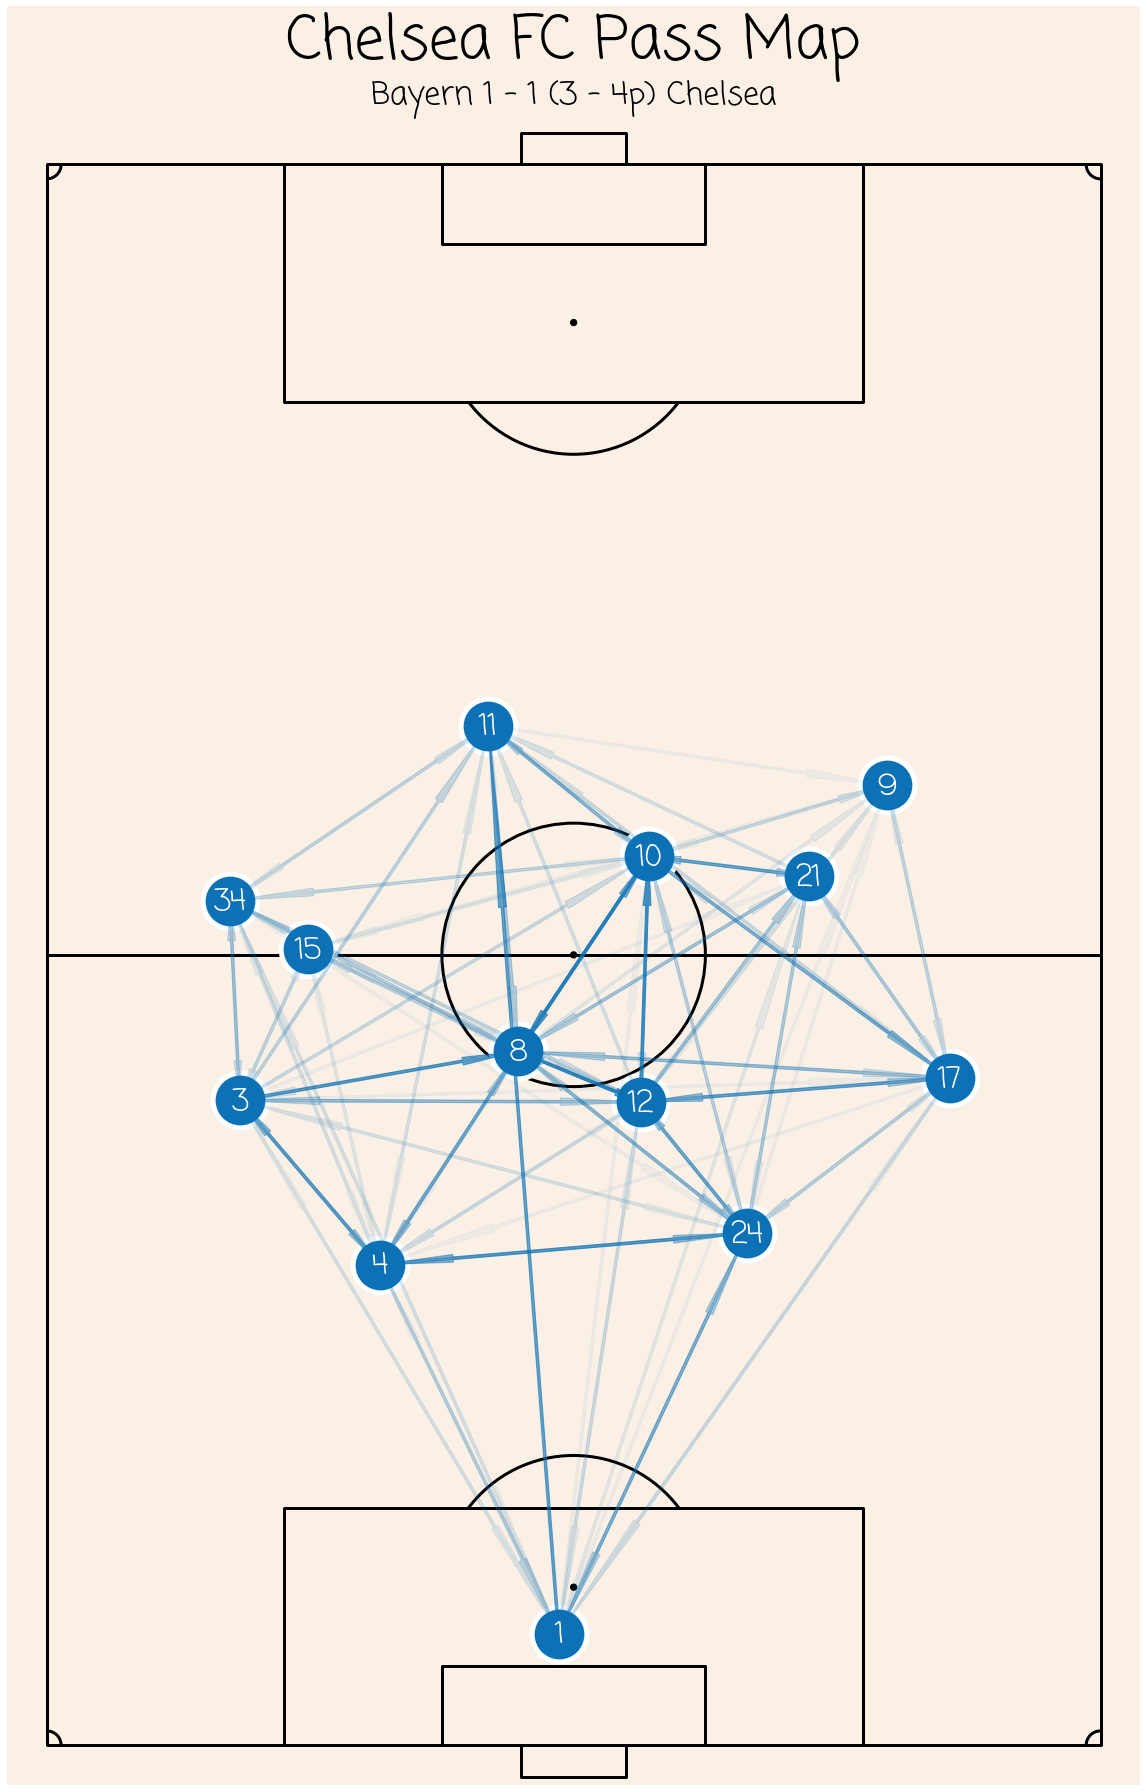

In [ ]:
# Define colours
pitch_colour = '#FAF0E6'
line_colour = 'black'
goal_colour = 'darkgreen'
shot_on_colour = 'green'
shot_off_colour = 'darkred'
shot_block_colour = 'grey'
text_colour = 'black'

node_size = 3000
node_colour = '#0D72B5'
edge_colour= 'white'

arrow_width = 1


# Draw the pitch
pitch = VerticalPitch(corner_arcs=True, goal_type='box',
                      pad_bottom=3, pad_top=12, pad_left=3, pad_right=3,
                      pitch_color=pitch_colour, line_color=line_colour, linewidth=3)
fig, ax = pitch.draw(figsize=(25, 25))

# Add title text
pitch.annotate('Chelsea FC Pass Map', xy=(129, 40), c=text_colour, va='center', ha='center', weight='bold', ax=ax,fontproperties = font_title)
pitch.annotate('Bayern 1 - 1 (3 - 4p) Chelsea', xy=(125, 40), c=text_colour, va='center', ha='center', weight='bold', ax=ax,fontproperties = font_score)

for index, row in chelsea_played.iterrows():

  if str(row["player_name"]) == 'Petr Čech':
    display_name = 'Petr Cech'
  elif str(row["player_nickname"]) == 'None':
    display_name = row['player_name']
  else:
    display_name = row['player_nickname']

  shirt_number = row['jersey_number']
  player_name = row['player_name']
  player_df = events_df.loc[events_df['player'] == player_name]

  average_x = []
  average_y = []

  for index, row in player_df.iterrows():
    if str(row['location_x']) != 'nan':
      if str(row['location_y']) != 'nan':
        average_x.append(row['location_x'])
        average_y.append(row['location_y'])

  average_x = sum(average_x) / len(average_x)
  average_y = sum(average_y) / len(average_y)


  player_node = pitch.scatter(average_x, average_y, s=node_size, color=node_colour, edgecolors=edge_colour, linewidth=5, alpha=1, ax=ax)
  # pitch.annotate(display_name, xy=(average_x - 3.5, average_y), c=text_colour, va='center', ha='center', ax=ax, font_properties=font_name)
  pitch.annotate(shirt_number, xy=(average_x - 0.25, average_y), c='white', va='center', ha='center', ax=ax, font_properties=font_number)


  # Plot passes
  player_passes = completed_passes.loc[completed_passes['player'] == player_name]
  player_pass_recipients = set(player_passes['pass_recipient'].tolist())

  for name in player_pass_recipients:
    pass_recipient = name
    pass_recipient_events = events_df.loc[events_df['player'] == pass_recipient]

    pass_recipient_x_list = []
    pass_recipient_y_list = []

    for index, row in pass_recipient_events.iterrows():
      if str(row['location_x']) != 'nan':
        if str(row['location_y']) != 'nan':
          pass_recipient_x_list.append(row['location_x'])
          pass_recipient_y_list.append(row['location_y'])

    pass_recipient_x = sum(pass_recipient_x_list) / len(pass_recipient_x_list)
    pass_recipient_y = sum(pass_recipient_y_list) / len(pass_recipient_y_list)

    player_passes_df = player_passes.loc[player_passes['pass_recipient'] == pass_recipient]

    alpha = (len(player_passes_df) / len(chelsea_completed_passes)) * 20

    shot_arrow = plt.Arrow(average_y, average_x, pass_recipient_y - average_y, pass_recipient_x - average_x, width=arrow_width, color=node_colour, alpha=alpha)
    ax.add_patch(shot_arrow)

### Chelsea FC Pass Map (Horizontal)

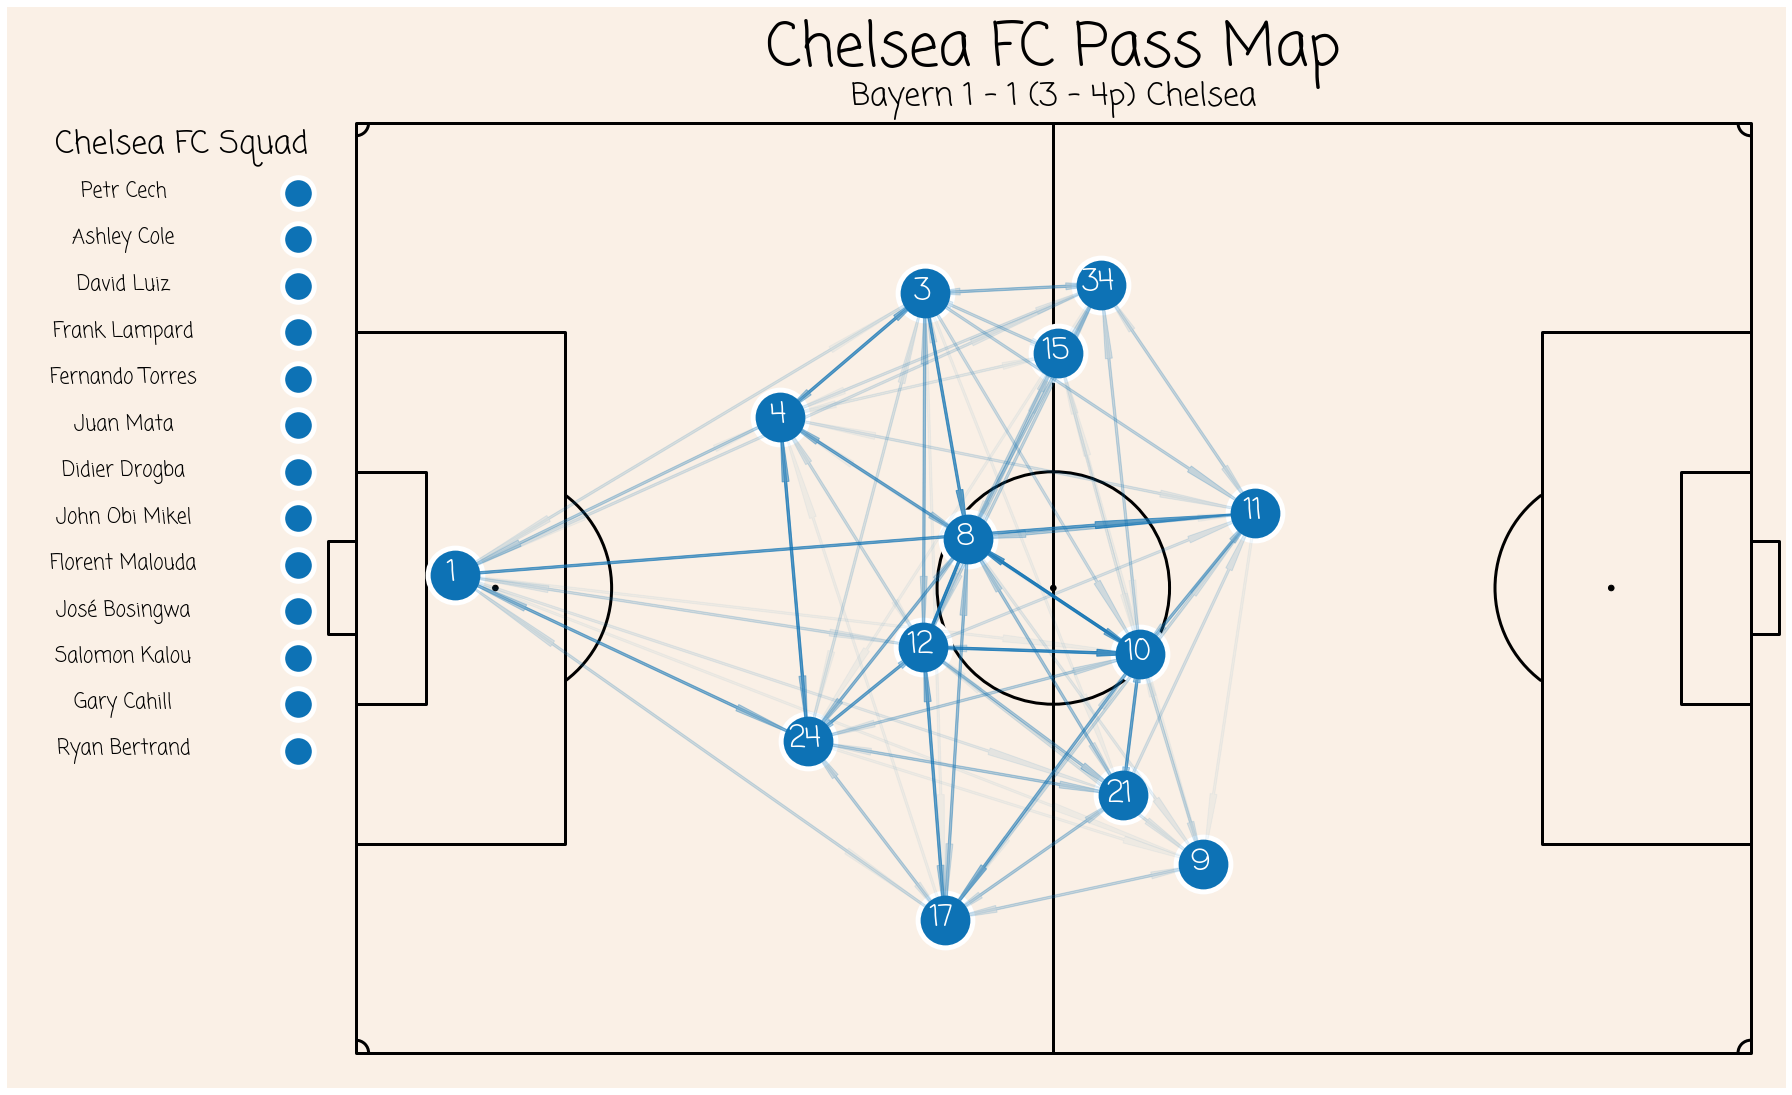

In [ ]:
# Define colours
pitch_colour = '#FAF0E6'
line_colour = 'black'
goal_colour = 'darkgreen'
shot_on_colour = 'green'
shot_off_colour = 'darkred'
shot_block_colour = 'grey'
text_colour = 'black'

node_size = 3000
node_colour = '#0D72B5'
edge_colour= 'white'

arrow_width = 1

name_x = -20
name_y = 6
lineup_x = -5
lineup_size = 1000


# Draw the pitch
pitch = Pitch(corner_arcs=True, goal_type='box',
                      pad_bottom=3, pad_top=10, pad_left=30, pad_right=3,
                      pitch_color=pitch_colour, line_color=line_colour, linewidth=3)
fig, ax = pitch.draw(figsize=(25, 25))

# Add title text
pitch.annotate('Chelsea FC Pass Map', xy=(60, -6), c=text_colour, va='center', ha='center', weight='bold', ax=ax,fontproperties = font_title)
pitch.annotate('Bayern 1 - 1 (3 - 4p) Chelsea', xy=(60, -2), c=text_colour, va='center', ha='center', weight='bold', ax=ax,fontproperties = font_score)

pitch.annotate('Chelsea FC Squad', xy=(-15, 2), c=text_colour, va='center', ha='center', ax=ax, font_properties=font_score)

for index, row in chelsea_played.iterrows():

  if str(row["player_name"]) == 'Petr Čech':
    display_name = 'Petr Cech'
  elif str(row["player_nickname"]) == 'None':
    display_name = row['player_name']
  else:
    display_name = row['player_nickname']

  shirt_number = row['jersey_number']
  player_name = row['player_name']
  player_df = events_df.loc[events_df['player'] == player_name]

  average_x = []
  average_y = []

  for index, row in player_df.iterrows():
    if str(row['location_x']) != 'nan':
      if str(row['location_y']) != 'nan':
        average_x.append(row['location_x'])
        average_y.append(row['location_y'])

  average_x = sum(average_x) / len(average_x)
  average_y = sum(average_y) / len(average_y)


  player_node = pitch.scatter(average_x, average_y, s=node_size, color=node_colour, edgecolors=edge_colour, linewidth=5, alpha=1, ax=ax)
  # pitch.annotate(display_name, xy=(average_x, average_y + 3.5), c=text_colour, va='center', ha='center', ax=ax, font_properties=font_name)
  pitch.annotate(shirt_number, xy=(average_x - 0.25, average_y), c='white', va='center', ha='center', ax=ax, font_properties=font_number)

  # Add name at the side
  lineup_node = pitch.scatter(lineup_x, name_y, s=lineup_size, color=node_colour, edgecolors=edge_colour, linewidth=5, alpha=1, ax=ax)
  pitch.annotate(display_name, xy=(name_x, name_y), c=text_colour, va='center', ha='center', ax=ax, font_properties=font_name)
  name_y = name_y + 4

  # Plot passes
  player_passes = completed_passes.loc[completed_passes['player'] == player_name]
  player_pass_recipients = set(player_passes['pass_recipient'].tolist())

  for name in player_pass_recipients:
    pass_recipient = name
    pass_recipient_events = events_df.loc[events_df['player'] == pass_recipient]

    pass_recipient_x_list = []
    pass_recipient_y_list = []

    for index, row in pass_recipient_events.iterrows():
      if str(row['location_x']) != 'nan':
        if str(row['location_y']) != 'nan':
          pass_recipient_x_list.append(row['location_x'])
          pass_recipient_y_list.append(row['location_y'])

    pass_recipient_x = sum(pass_recipient_x_list) / len(pass_recipient_x_list)
    pass_recipient_y = sum(pass_recipient_y_list) / len(pass_recipient_y_list)

    player_passes_df = player_passes.loc[player_passes['pass_recipient'] == pass_recipient]

    alpha = (len(player_passes_df) / len(chelsea_completed_passes)) * 20

    shot_arrow = plt.Arrow(average_x, average_y, pass_recipient_x - average_x, pass_recipient_y - average_y, width=arrow_width, color=node_colour, alpha=alpha)
    ax.add_patch(shot_arrow)

### FC Bayern Munich Pass Map (Vertical)

In [ ]:
# Bayern Munich squad
bayern_munich_lineup = sb.lineups(match_id=18237)["Bayern Munich"]
bayern_munich_lineup = bayern_munich_lineup.sort_values(by='jersey_number', ascending=True)

# Bayern Munich players who played at any point in the match
bayern_munich_played = bayern_munich_lineup[bayern_munich_lineup.positions.str.len()>0]

# Bayern Munich players who started the match
bayern_munich_started_list = []
for index, row in bayern_munich_played.iterrows():
  if row['positions'][0]['from'] == '00:00':
    bayern_munich_started_list.append(row['player_id'])

bayern_munich_started = bayern_munich_played[bayern_munich_played['player_id'].isin(bayern_munich_started_list)]
bayern_munich_started

,player_id,player_name,player_nickname,jersey_number,country,cards,positions
3,5570,Manuel Neuer,None,1,Germany,[],"[{'position_id': 1, 'position': 'Goalkeeper', ..."
9,8223,Franck Bilal Ribéry,Franck Ribéry,7,France,[],"[{'position_id': 21, 'position': 'Left Wing', ..."
8,8218,Arjen Robben,None,10,Netherlands,[],"[{'position_id': 17, 'position': 'Right Wing',..."
5,5578,Jérôme Boateng,None,17,Germany,[],"[{'position_id': 3, 'position': 'Right Center ..."
15,19295,Philipp Lahm,None,21,Germany,[],"[{'position_id': 2, 'position': 'Right Back', ..."
1,5562,Thomas Müller,None,25,Germany,[],"[{'position_id': 19, 'position': 'Center Attac..."
0,4628,Diego Armando Valentin Contento,Diego Contento,26,Germany,[],"[{'position_id': 6, 'position': 'Left Back', '..."
12,18414,Bastian Schweinsteiger,None,31,Germany,"[{'time': '01:44', 'card_type': 'Yellow Card',...","[{'position_id': 9, 'position': 'Right Defensi..."
2,5565,Mario Gómez García,Mario Gómez,33,Germany,[],"[{'position_id': 23, 'position': 'Center Forwa..."
4,5574,Toni Kroos,None,39,Germany,[],"[{'position_id': 11, 'position': 'Left Defensi..."


In [ ]:
bayern_munich_completed_passes = completed_passes.loc[completed_passes['team'] == 'Bayern Munich']

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 263 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 263 missing from current font.
  font.set_text(s, 0, flags=flags)


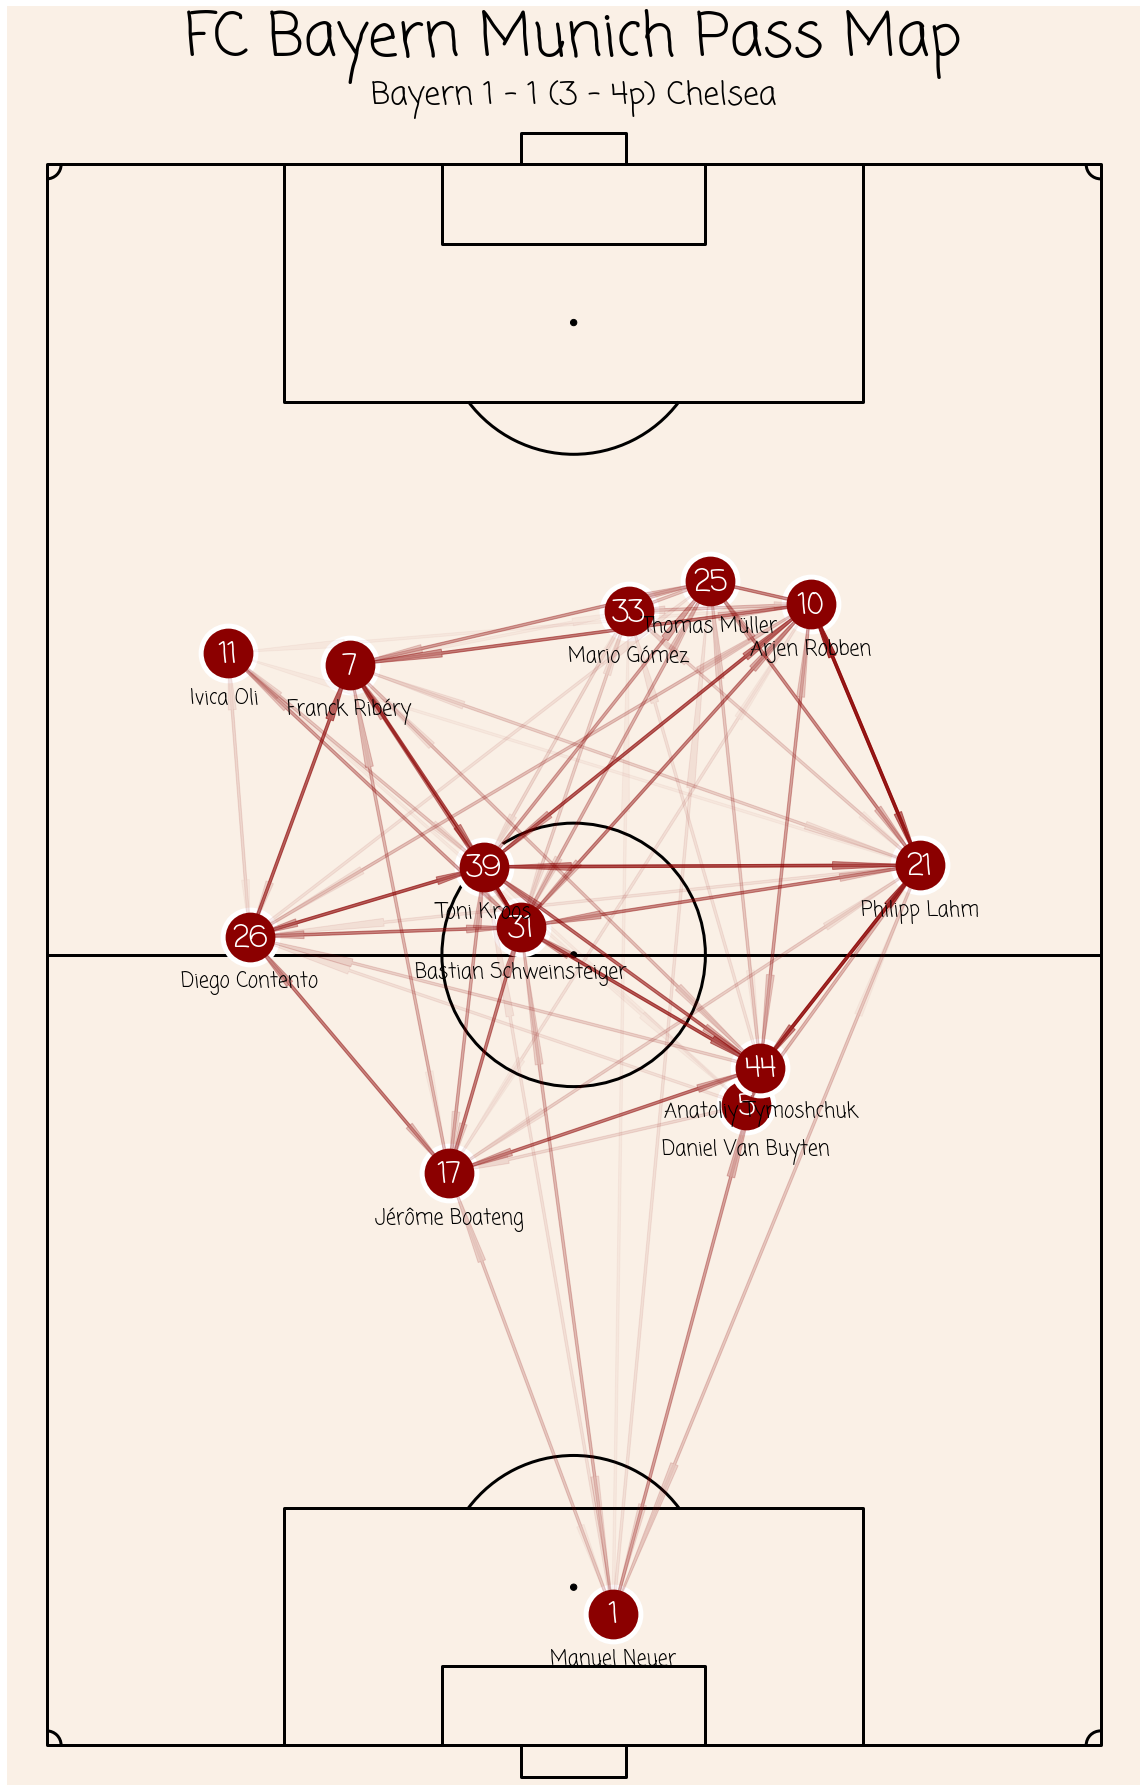

In [ ]:
# Define colours
pitch_colour = '#FAF0E6'
line_colour = 'black'
goal_colour = 'darkgreen'
shot_on_colour = 'green'
shot_off_colour = 'darkred'
shot_block_colour = 'grey'
text_colour = 'black'

node_size = 3000
node_colour = 'darkred'
edge_colour= 'white'

arrow_width = 1


# Draw the pitch
pitch = VerticalPitch(corner_arcs=True, goal_type='box',
                      pad_bottom=3, pad_top=12, pad_left=3, pad_right=3,
                      pitch_color=pitch_colour, line_color=line_colour, linewidth=3)
fig, ax = pitch.draw(figsize=(25, 25))

# Add title text
pitch.annotate('FC Bayern Munich Pass Map', xy=(129, 40), c=text_colour, va='center', ha='center', weight='bold', ax=ax,fontproperties = font_title)
pitch.annotate('Bayern 1 - 1 (3 - 4p) Chelsea', xy=(125, 40), c=text_colour, va='center', ha='center', weight='bold', ax=ax,fontproperties = font_score)

for index, row in bayern_munich_played.iterrows():

  if str(row["player_name"]) == 'Petr Čech':
    display_name = 'Petr Cech'
  elif str(row["player_nickname"]) == 'None':
    display_name = row['player_name']
  else:
    display_name = row['player_nickname']

  shirt_number = row['jersey_number']
  player_name = row['player_name']
  player_df = events_df.loc[events_df['player'] == player_name]

  average_x = []
  average_y = []

  for index, row in player_df.iterrows():
    if str(row['location_x']) != 'nan':
      if str(row['location_y']) != 'nan':
        average_x.append(row['location_x'])
        average_y.append(row['location_y'])

  average_x = sum(average_x) / len(average_x)
  average_y = sum(average_y) / len(average_y)


  player_node = pitch.scatter(average_x, average_y, s=node_size, color=node_colour, edgecolors=edge_colour, linewidth=5, alpha=1, ax=ax)
  pitch.annotate(display_name, xy=(average_x - 3.5, average_y), c=text_colour, va='center', ha='center', ax=ax, font_properties=font_name)
  pitch.annotate(shirt_number, xy=(average_x - 0.25, average_y), c='white', va='center', ha='center', ax=ax, font_properties=font_number)


  # Plot passes
  player_passes = completed_passes.loc[completed_passes['player'] == player_name]
  player_pass_recipients = set(player_passes['pass_recipient'].tolist())

  for name in player_pass_recipients:
    pass_recipient = name
    pass_recipient_events = events_df.loc[events_df['player'] == pass_recipient]

    pass_recipient_x_list = []
    pass_recipient_y_list = []

    for index, row in pass_recipient_events.iterrows():
      if str(row['location_x']) != 'nan':
        if str(row['location_y']) != 'nan':
          pass_recipient_x_list.append(row['location_x'])
          pass_recipient_y_list.append(row['location_y'])

    pass_recipient_x = sum(pass_recipient_x_list) / len(pass_recipient_x_list)
    pass_recipient_y = sum(pass_recipient_y_list) / len(pass_recipient_y_list)

    player_passes_df = player_passes.loc[player_passes['pass_recipient'] == pass_recipient]

    alpha = (len(player_passes_df) / len(bayern_munich_completed_passes)) * 20

    shot_arrow = plt.Arrow(average_y, average_x, pass_recipient_y - average_y, pass_recipient_x - average_x, width=arrow_width, color=node_colour, alpha=alpha)
    ax.add_patch(shot_arrow)

### FC Bayern Munich Pass Map (Horizontal)

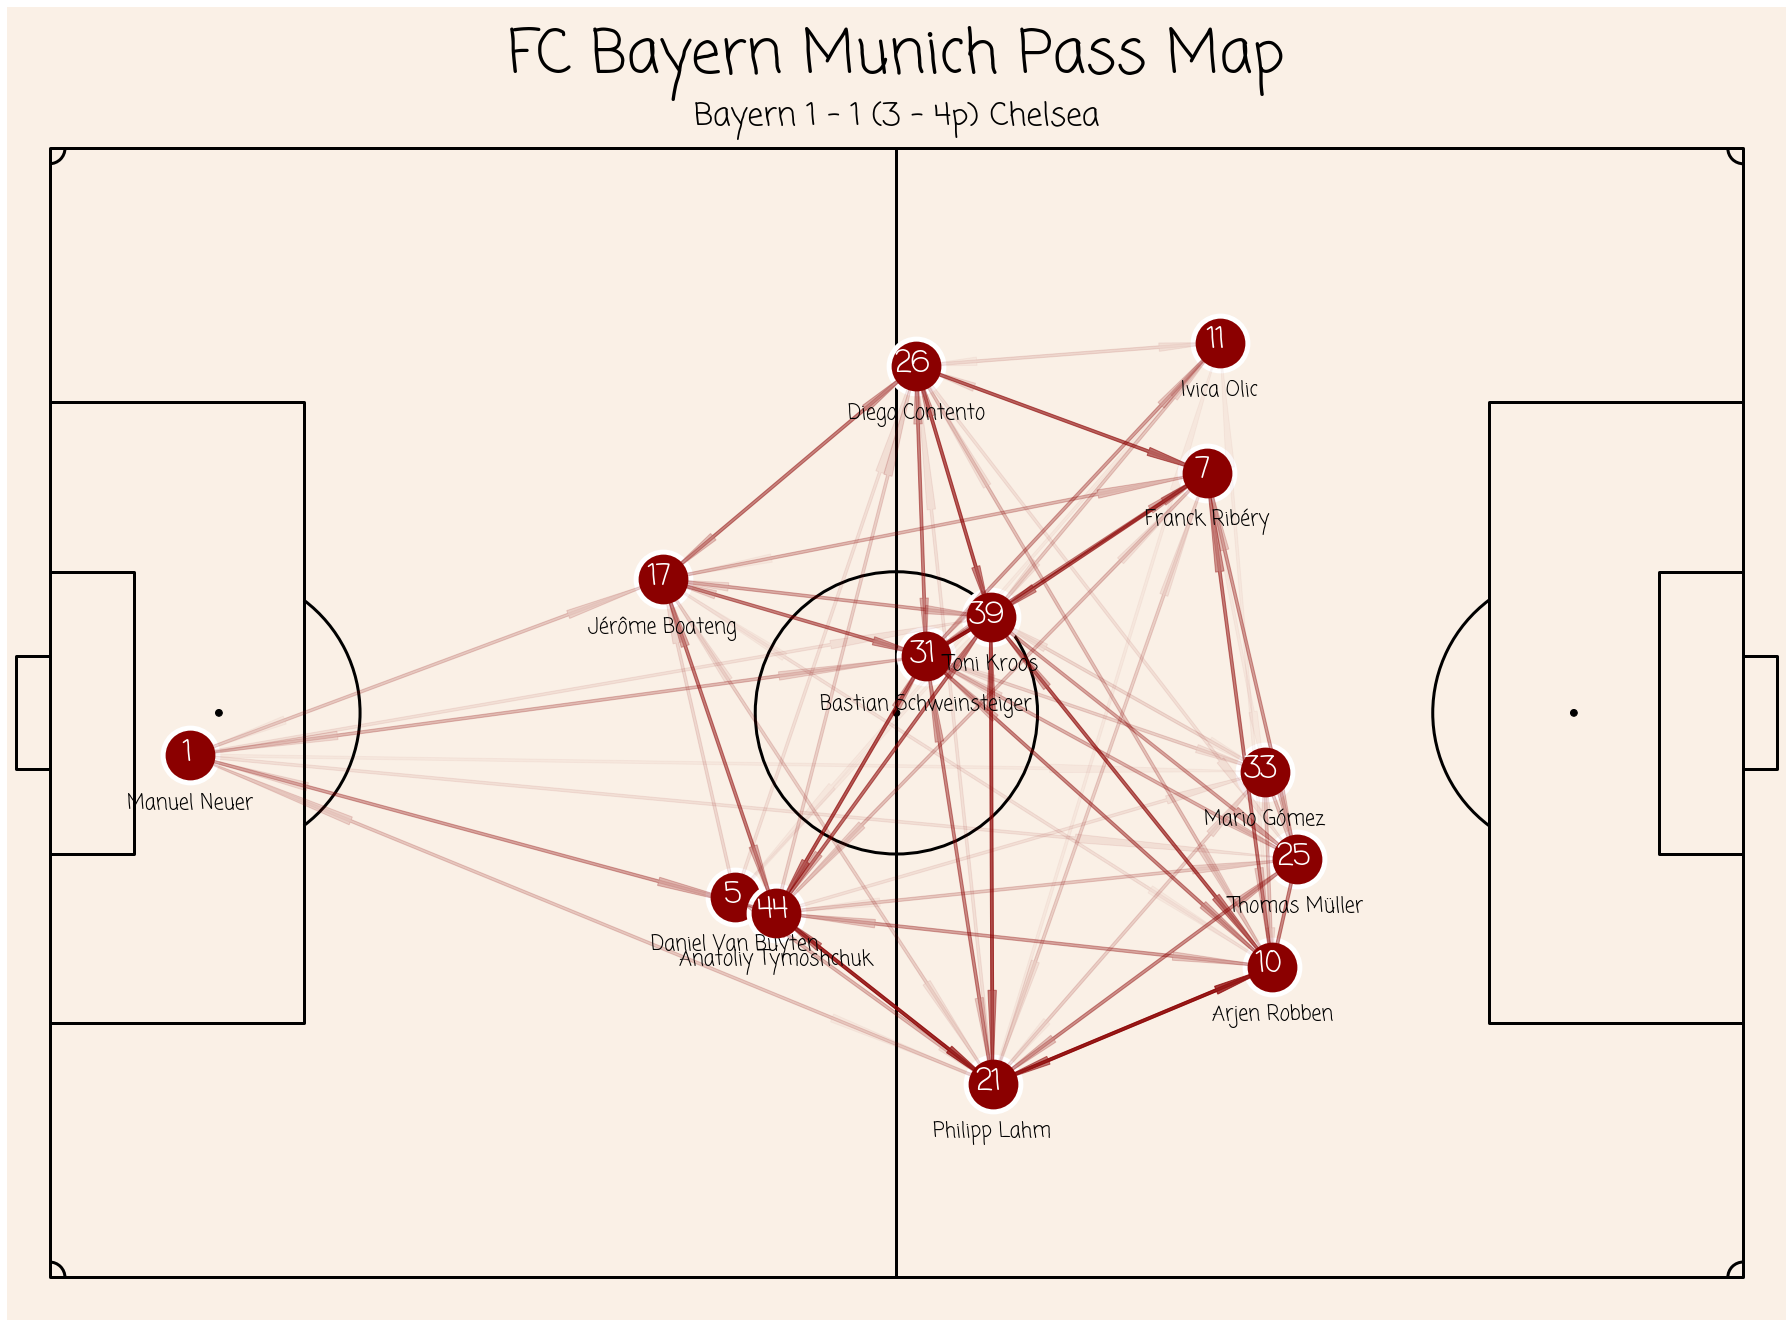

In [ ]:
# Define colours
pitch_colour = '#FAF0E6'
line_colour = 'black'
goal_colour = 'darkgreen'
shot_on_colour = 'green'
shot_off_colour = 'darkred'
shot_block_colour = 'grey'
text_colour = 'black'

node_size = 3000
node_colour = 'darkred'
edge_colour= 'white'

arrow_width = 1


# Draw the pitch
pitch = Pitch(corner_arcs=True, goal_type='box',
                      pad_bottom=3, pad_top=10, pad_left=3, pad_right=3,
                      pitch_color=pitch_colour, line_color=line_colour, linewidth=3)
fig, ax = pitch.draw(figsize=(25, 25))

# Add title text
pitch.annotate('FC Bayern Munich Pass Map', xy=(60, -6), c=text_colour, va='center', ha='center', weight='bold', ax=ax,fontproperties = font_title)
pitch.annotate('Bayern 1 - 1 (3 - 4p) Chelsea', xy=(60, -2), c=text_colour, va='center', ha='center', weight='bold', ax=ax,fontproperties = font_score)

for index, row in bayern_munich_played.iterrows():

  if str(row["player_name"]) == 'Petr Čech':
    display_name = 'Petr Cech'
  elif str(row["player_name"]) == 'Ivica Olić':
    display_name = 'Ivica Olic'
  elif str(row["player_nickname"]) == 'None':
    display_name = row['player_name']
  else:
    display_name = row['player_nickname']

  shirt_number = row['jersey_number']
  player_name = row['player_name']
  player_df = events_df.loc[events_df['player'] == player_name]

  average_x = []
  average_y = []

  for index, row in player_df.iterrows():
    if str(row['location_x']) != 'nan':
      if str(row['location_y']) != 'nan':
        average_x.append(row['location_x'])
        average_y.append(row['location_y'])

  average_x = sum(average_x) / len(average_x)
  average_y = sum(average_y) / len(average_y)


  player_node = pitch.scatter(average_x, average_y, s=node_size, color=node_colour, edgecolors=edge_colour, linewidth=5, alpha=1, ax=ax)
  pitch.annotate(display_name, xy=(average_x, average_y + 3.5), c=text_colour, va='center', ha='center', ax=ax, font_properties=font_name)
  pitch.annotate(shirt_number, xy=(average_x - 0.25, average_y), c='white', va='center', ha='center', ax=ax, font_properties=font_number)


  # Plot passes
  player_passes = completed_passes.loc[completed_passes['player'] == player_name]
  player_pass_recipients = set(player_passes['pass_recipient'].tolist())

  for name in player_pass_recipients:
    pass_recipient = name
    pass_recipient_events = events_df.loc[events_df['player'] == pass_recipient]

    pass_recipient_x_list = []
    pass_recipient_y_list = []

    for index, row in pass_recipient_events.iterrows():
      if str(row['location_x']) != 'nan':
        if str(row['location_y']) != 'nan':
          pass_recipient_x_list.append(row['location_x'])
          pass_recipient_y_list.append(row['location_y'])

    pass_recipient_x = sum(pass_recipient_x_list) / len(pass_recipient_x_list)
    pass_recipient_y = sum(pass_recipient_y_list) / len(pass_recipient_y_list)

    player_passes_df = player_passes.loc[player_passes['pass_recipient'] == pass_recipient]

    alpha = (len(player_passes_df) / len(bayern_munich_completed_passes)) * 20

    shot_arrow = plt.Arrow(average_x, average_y, pass_recipient_x - average_x, pass_recipient_y - average_y, width=arrow_width, color=node_colour, alpha=alpha)
    ax.add_patch(shot_arrow)